### Importación de datos



In [144]:
import pandas as pd

url = "./resources/tienda_1.csv"
url2 = "./resources/tienda_2.csv"
url3 = "./resources/tienda_3.csv"
url4 = "./resources/tienda_4.csv"

df_tiendas = {
    "tienda1": pd.read_csv(url),
    "tienda2": pd.read_csv(url2),
    "tienda3": pd.read_csv(url3),
    "tienda4": pd.read_csv(url4)
}

df_tiendas["tienda1"].head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



#### Convenir los tipos de datos inválidos a los correctos

In [145]:
for tienda in df_tiendas.values():
    tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], format="%d/%m/%Y")

In [146]:
revenue_per_store = {key: sum(values['Precio']) for key, values in df_tiendas.items()}

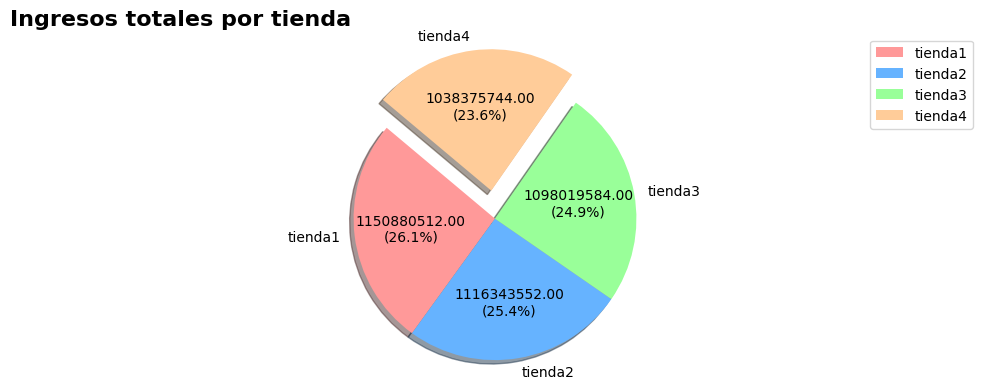

In [147]:
# Graficar los ingresos totales por tienda
import matplotlib.pyplot as plt

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

explode = [0.2 if value == min(revenue_per_store.values()) else 0 for value in revenue_per_store.values()]

plt.figure(figsize=(10,4))
plt.title('Ingresos totales por tienda', fontsize=16, fontweight='bold', loc="left",)
plt.pie(revenue_per_store.values(), 
        labels=revenue_per_store.keys(), 
        shadow=True, 
        startangle=140,
        colors=colors,
        explode=explode,
        autopct=lambda p: '{:.2f}\n({:.1f}%)'.format(p * sum(revenue_per_store.values()) / 100, p)
        )
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

#### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [148]:
# todo: VERSION SIN PANDAS
# sales_by_category_per_store = {key: {
#         category: sum([1 for product in store['Categoría del Producto'] if product == category]) for category in set(store['Categoría del Producto'])
#     } for key, store in df_tiendas.items()}
# todo : VERSION CON PANDAS
sales_by_category_per_store = {}
for key, store in df_tiendas.items():
     sales_by_category_per_store[key] = store['Categoría del Producto'].value_counts().sort_values().to_dict()
     

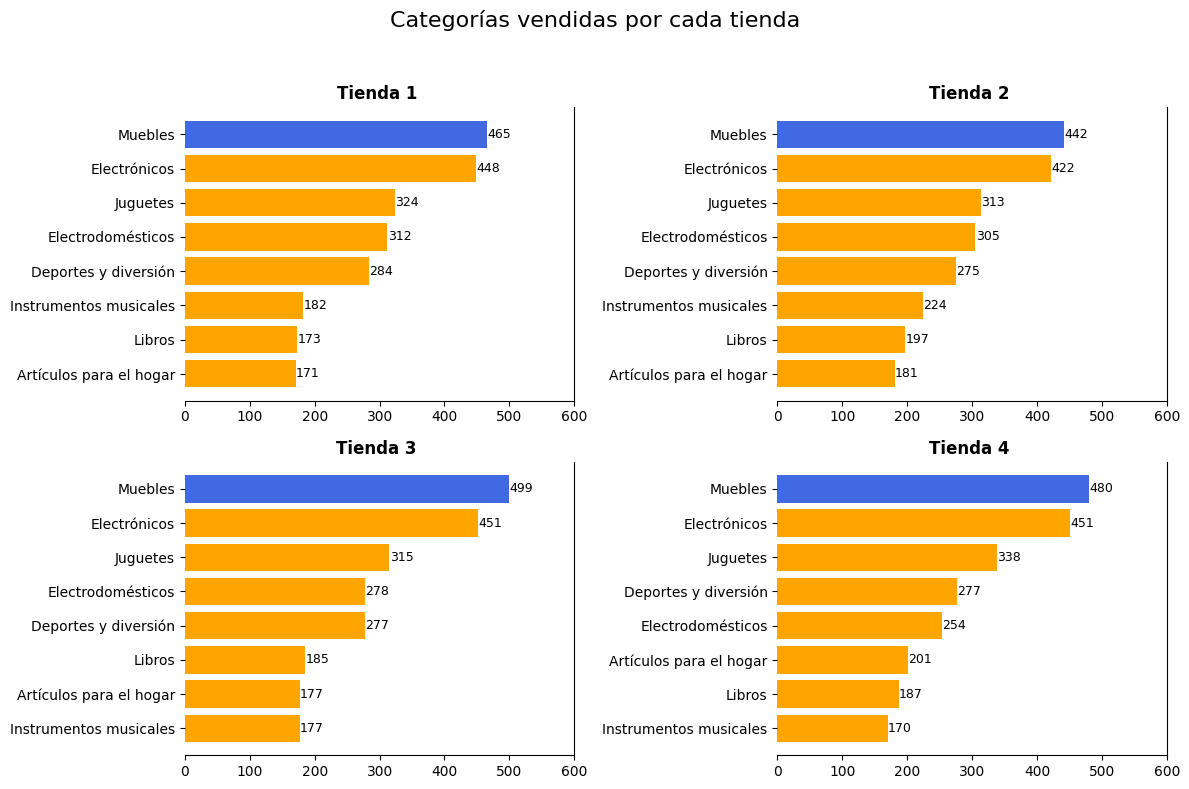

In [149]:
import matplotlib.pyplot as plt
import re

# Suponiendo que tienes hasta 4 tiendas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Categorías vendidas por cada tienda', fontsize=16)

axes = axes.ravel()
for i, (key, data) in enumerate(sales_by_category_per_store.items()):
    ax = axes[i]
    categories = list(data.keys())
    counts = list(data.values())
        
    max_index = counts.index(max(counts))
    bar_colors = ['orange'] * len(counts)
    bar_colors[max_index] = 'royalblue'
        
    ax.barh(categories, counts, color=bar_colors)
    ax.set_xlim(0, 600)
    title = " ".join(re.split(r"(\d+)", key)).capitalize()
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.spines[['top', 'left']].set_visible(False)
    
    for j, count in enumerate(counts):
        ax.text(count + 0.5, j, str(count), va='center', ha='left', fontsize=9)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 3. Calificación promedio de la tienda



En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda.
El objetivo es conocer la satisfacción del cliente con los productos vendidos.


In [150]:
average_rating_per_store = {key: round(store['Calificación'].mean(), 2) for key, store in df_tiendas.items()}

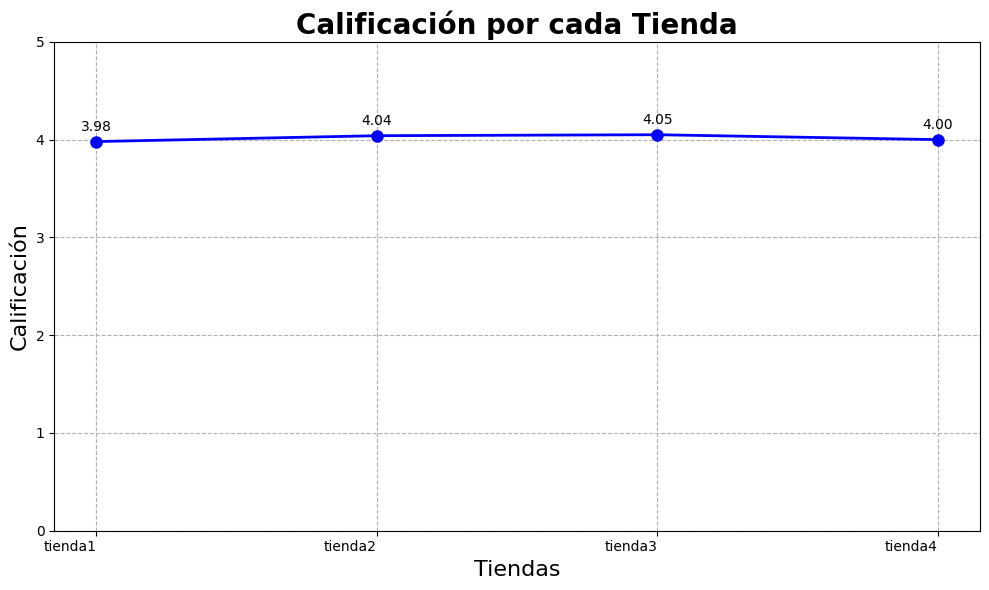

In [151]:
# GRÁFICA DE PUNTOS PARA MOSTRAR LA CALIFICACIÓN PROMEDIO DE CADA TIENDA
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Calificación por cada Tienda', fontsize=20, fontweight="bold")
plt.plot(average_rating_per_store.keys(), average_rating_per_store.values(), marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

for i, rating in enumerate(average_rating_per_store.values()):
    plt.text(list(average_rating_per_store.keys())[i], rating + 0.08, f'{rating:.2f}', ha='center', va='bottom')

plt.xlabel('Tiendas', fontsize=16)
plt.ylabel('Calificación', fontsize=16)
plt.ylim(0, 5)
plt.xticks(ha="right")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [152]:
all_selling_products_per_store = {key: store['Producto'].value_counts().sort_values(ascending=False).to_dict() for key, store in df_tiendas.items()}

products_sold_per_store = {}

for key, value in all_selling_products_per_store.items():
    sorted_items = list(value.items())
    top_3 = dict(sorted_items[:5])    
    bottom_3 = dict(sorted_items[-5:])
    products_sold_per_store[key] = {
        'Más vendidos': top_3,
        'Menos vendidos': bottom_3
    }


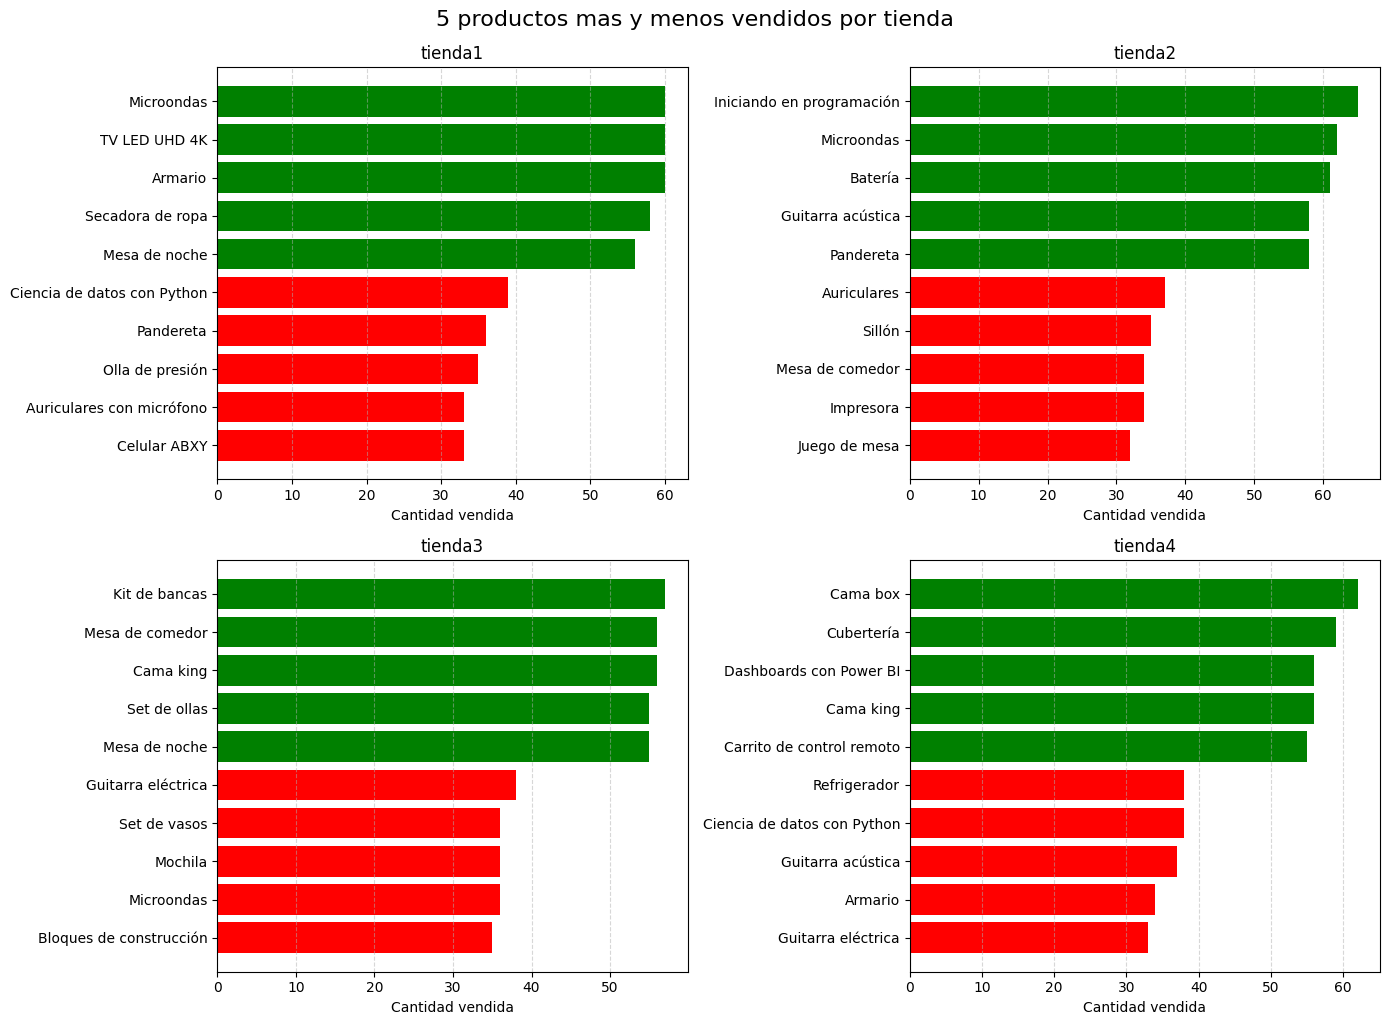

In [153]:
import matplotlib.pyplot as plt

# Crear figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

colors_map = {
    'Más vendidos': 'green',
    'Menos vendidos': 'red'
}

for i, (store_name, data) in enumerate(products_sold_per_store.items()):

    ax = axs[i]

    all_products = {**data['Más vendidos'], **data['Menos vendidos']}
    product_names = list(all_products.keys())
    product_values = list(all_products.values())

    # Asignar color por grupo
    colors = [
        colors_map['Más vendidos'] if product in data['Más vendidos'] else colors_map['Menos vendidos']
        for product in product_names
    ]

    ax.barh(product_names, product_values, color=colors)
    ax.set_title(f"{store_name}")
    ax.set_xlabel("Cantidad vendida")
    ax.invert_yaxis()
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("5 productos mas y menos vendidos por tienda", fontsize=16, y=1.02)
plt.show()


# 5. Envío promedio por tienda
En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [154]:
average_shipping_cost_per_store = {key: round(store['Costo de envío'].mean(), 2) for key, store in df_tiendas.items()}
average_shipping_cost_per_store


{'tienda1': np.float64(26018.61),
 'tienda2': np.float64(25216.24),
 'tienda3': np.float64(24805.68),
 'tienda4': np.float64(23459.46)}

# Extra -> Análisis del desempeño geográfico

In [179]:
# Coordenadas Geográficas: Ubicación de las transacciones.
# longitud -> posición este-oeste (horizontal)
# latitud -> posición norte-sur (vertical)
df_tiendas["tienda1"].head()
longitudes = df_tiendas['tienda1']['lon']
latitudes = df_tiendas['tienda1']['lat']


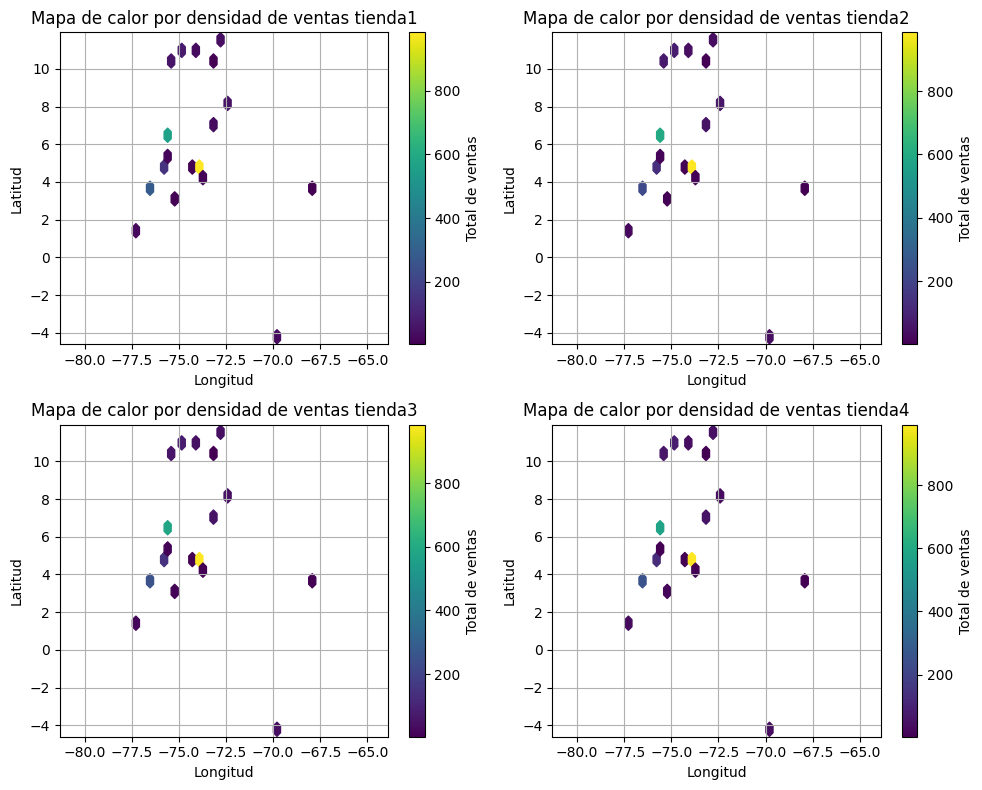

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
axs = ax.ravel()

for i,(key, store) in enumerate(df_tiendas.items()):
    counts = store.groupby(['lat', 'lon']).size().reset_index(name='count')
    ax = axs[i]
    # Mapa de calor
    hb = ax.hexbin(
        counts['lon'], counts['lat'],
        C=counts['count'],
        gridsize=25,       # Más alto = más resolución
        reduce_C_function=np.sum,  # Total de ventas por celda
        cmap='YlOrRd'
    )
    fig.colorbar(hb, ax=ax, label='Total de ventas')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.set_title('Mapa de calor por densidad de ventas ' + key)
    ax.grid(True)
    ax.axis('equal')
# Ajustando espacio entre subplots
plt.tight_layout()
plt.show()

    # print(counts)

    # plt.figure(figsize=(8, 6))
    # scatter = plt.scatter(
    #     counts['lon'], counts['lat'],
    #     s=counts['count'] * 0.5,  # tamaño proporcional
    #     c=counts['count'],        # color por frecuencia
    #     cmap='viridis',
    #     alpha=0.6,
    #     edgecolor='black'
    # )

    # plt.colorbar(scatter, label='Frecuencia')
    # plt.xlabel('Longitud')
    # plt.ylabel('Latitud')
    # plt.title('Coordenadas más frecuentes')
    # plt.grid(True, alpha=0.5)
    # plt.axis('equal')
    # plt.show()



In [197]:
import folium

# Crear mapa centrado en Colombia
mapa = folium.Map(location=[4.6, -74.1], zoom_start=6)

# Agregar puntos con tamaño proporcional
for _, row in counts.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['count'] * 0.02,  # ajusta según escala
        popup=f"Frecuencia: {row['count']}",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mapa)

# Mostrar
mapa.save('mapa_frecuencias.html')


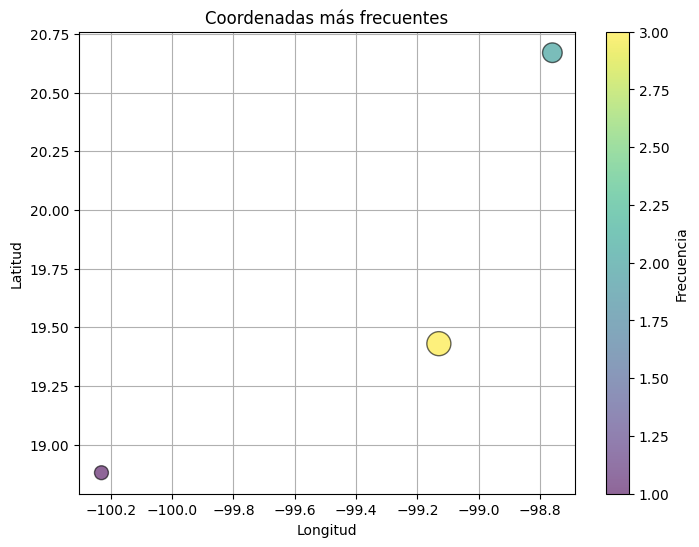

In [181]:
import matplotlib.pyplot as plt
import pandas as pd

# Simular datos
data = pd.DataFrame({
    'lat': [19.43, 19.43, 20.67, 18.88, 19.43, 20.67],
    'lon': [-99.13, -99.13, -98.76, -100.23, -99.13, -98.76]
})

# Contar ocurrencias de cada coordenada
counts = data.groupby(['lat', 'lon']).size().reset_index(name='count')

# Graficar con tamaño proporcional a la frecuencia
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    counts['lon'], counts['lat'],
    s=counts['count'] * 100,  # tamaño proporcional
    c=counts['count'],        # color por frecuencia
    cmap='viridis',
    alpha=0.6,
    edgecolor='black'
)

plt.colorbar(scatter, label='Frecuencia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Coordenadas más frecuentes')
plt.grid(True)
plt.show()


In [31]:
    
print("\nProductos mas vendidos por tienda:")

def get_count_total_sales_by_product(lista:list[str]):
    filtered_products = list(set([product for product in lista]))
    count_total_products = {filtered_products[i]: sum([1 for product in lista if product == filtered_products[i]]) for i in range(len(filtered_products))}    
    return count_total_products

def get_top_products(products):
    sorted_products = sorted(products.items(), key=lambda x: x[1], reverse=True)
    return sorted_products[:1]

def get_lowest_selling_products(products):
    # ordenamos por la segunda posición x=(label, value) entonces x[1] = value 
    sorted_products = sorted(products.items(), key=lambda x: x[1])
    return sorted_products[:1]

stores_names = []
most_selling_products_tags = []
most_selling_products = []
lowest_selling_products_tags = []
lowest_selling_products = []

for store_name, store in stores.items():
    all_sales_by_product = get_count_total_sales_by_product(store['Producto'])
    top_product = get_top_products(all_sales_by_product)
    lowest_selling_product = get_lowest_selling_products(all_sales_by_product)
    
    stores_names.append(store_name)
    most_selling_products_tags.append(top_product[0][0])
    most_selling_products.append(top_product[0][1])
    lowest_selling_products_tags.append(lowest_selling_product[0][0])
    lowest_selling_products.append(lowest_selling_product[0][1])
    
print(most_selling_products_tags, most_selling_products)
    


Productos mas vendidos por tienda:
['Microondas', 'Iniciando en programación', 'Kit de bancas', 'Cama box'] [60, 65, 57, 62]


[0 1 2 3]


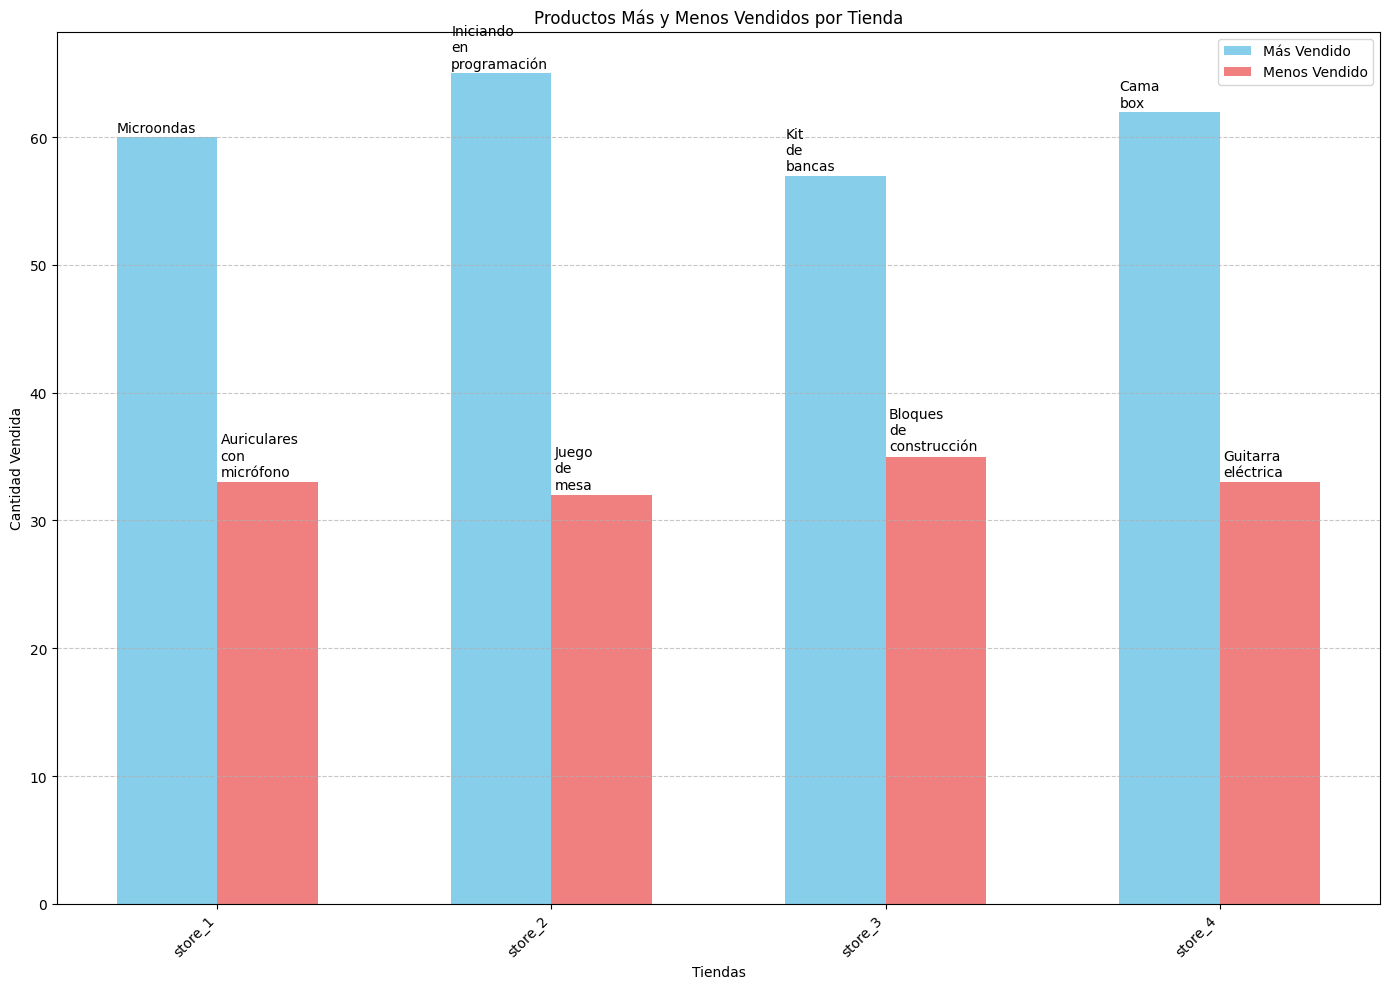

In [79]:
import matplotlib.pyplot as plt
# figura y el objeto para ejecutar las funciones de matplotlib
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(stores_names))  # las localizaciones de las etiquetas de las tiendas
print(x)
width = 0.30  # el ancho de las barras
#        coordenadas, valores, ancho, etiqueta, color
rects1 = ax.bar(x - width/2, most_selling_products,width ,label='Más Vendido', color='skyblue')
rects2 = ax.bar(x + width/2, lowest_selling_products,width ,label='Menos Vendido', color='lightcoral')

for i,j in zip(x, most_selling_products):
    display_name = '\n'.join(most_selling_products_tags[i].split(' '))
    ax.annotate(display_name, xy=(i-0.3, j + 0.4),)
    
for i,j in zip(x, lowest_selling_products):
    display_name = '\n'.join(lowest_selling_products_tags[i].split(' '))
    # display_name = (lowest_selling_products_tags[i][:10] + '...') if len(lowest_selling_products_tags[i]) > 12 else lowest_selling_products_tags[i]
    ax.annotate(display_name, xy=(i+.01, j + 0.5),)

ax.set_ylabel('Cantidad Vendida')
ax.set_xlabel('Tiendas')
ax.set_title('Productos Más y Menos Vendidos por Tienda')
# Seteamos la coordenadas donde se van a colocar las etiquetas de las tiendas
ax.set_xticks(x)
ax.set_xticklabels(stores_names, rotation=45, ha="right") # Rotar etiquetas de tiendas si son largas
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout() # Ajusta el diseño para que todo quepa bien
plt.show()